# Reliance Stocks - EDA
---

In this notebook, we will perform an EDA on the RELIANCE stock prices over an year's time from July-2019 to July-2020. We will try to observe some dominant and hidden trends in the data. Let us begin by importing all the project dependencies. 

In [83]:
import os

import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, ArtistAnimation
import seaborn as sns

## Importing the Data
---

In [84]:
stocks_df = pd.read_csv('../input/reliance-stock-datajul-2019-jul-2020/Stock-Data-Reliance.csv')
stocks_df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"Jul 15, 2020","1,937.95","1,978.80","1,911.40","1,908.40","1,908.40","44,649,543"
2,2,"Jul 14, 2020","1,934.00","1,941.70","1,887.30","1,917.00","1,917.00","31,073,305"
3,3,"Jul 13, 2020","1,903.35","1,947.70","1,900.00","1,935.00","1,935.00","32,124,262"
4,4,"Jul 10, 2020","1,828.50","1,884.60","1,824.25","1,878.05","1,878.05","20,195,218"


## Data Wrangling
---

In this section, we will clean the dataset, removing all the unnecesary elements to prepare it for EDA.

First, let us drop the 'Unnamed: 0) column.

In [85]:
stocks_df.drop(['Unnamed: 0'], axis = 1, inplace = True)
stocks_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Jul 15, 2020","1,937.95","1,978.80","1,911.40","1,908.40","1,908.40","44,649,543"
2,"Jul 14, 2020","1,934.00","1,941.70","1,887.30","1,917.00","1,917.00","31,073,305"
3,"Jul 13, 2020","1,903.35","1,947.70","1,900.00","1,935.00","1,935.00","32,124,262"
4,"Jul 10, 2020","1,828.50","1,884.60","1,824.25","1,878.05","1,878.05","20,195,218"


Let us now check column-wise the number of NaN values in the dataset. 

In [86]:
null = pd.DataFrame(stocks_df.isnull().sum(axis = 0), columns = ['total null vals'])
null['percent_null'] = null['total null vals']/len(stocks_df)
null

,total null vals,percent_null
Date,1,0.004
Open,2,0.008
High,4,0.016
Low,4,0.016
Close,4,0.016
Adj Close,4,0.016
Volume,4,0.016


As we can see, the total null values are less than 0.02% of the total data. However since stock data comprises of a time series, dropping the NaN data directly can result in losing some important data. So before we drop the data, let us first check the rows with the null values.

In [87]:
stocks_df[stocks_df.High.isnull()]

,Date,Open,High,Low,Close,Adj Close,Volume
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,"Jul 02, 2020",6.5 Dividend,NaN,NaN,NaN,NaN,NaN
234,"Aug 02, 2019",6.43896 Dividend,NaN,NaN,NaN,NaN,NaN
249,*Close price adjusted for splits.**Adjusted cl...,NaN,NaN,NaN,NaN,NaN,NaN


As we can see, dropping the rows with null values won't cause any data loss. So let us go ahead and drop these values.

In [88]:
stocks_df.dropna(axis = 0, inplace = True)
stocks_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1,"Jul 15, 2020","1,937.95","1,978.80","1,911.40","1,908.40","1,908.40","44,649,543"
2,"Jul 14, 2020","1,934.00","1,941.70","1,887.30","1,917.00","1,917.00","31,073,305"
3,"Jul 13, 2020","1,903.35","1,947.70","1,900.00","1,935.00","1,935.00","32,124,262"
4,"Jul 10, 2020","1,828.50","1,884.60","1,824.25","1,878.05","1,878.05","20,195,218"
5,"Jul 09, 2020","1,809.00","1,835.00","1,786.25","1,824.25","1,824.25","16,807,336"


Now let us check the data type for each column in our dataframe.

In [89]:
stocks_df.dtypes

Date         object
Open         object
High         object
Low          object
Close        object
Adj Close    object
Volume       object
dtype: object

Here's where we observe some problems in our dataset. Firstly, the supposed numerical columns— **Open,High, Low, Close, Adj Close, Volume** are actually of the data-type object. This is due to the comma(,) as the thousands separator. So we need to convert these columns to numerical data. Also, we need to convert the **Date** column to date-time type. 

In [90]:
# converting Date column to date-time format
stocks_df.Date = pd.to_datetime(stocks_df.Date)


# converting Open, High, Low, Close, Adj Close, Volume to floating points
def floatify(x):
    try:
        x = float(x.replace(',',''))
    except:
        x = np.nan
    return x

cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

for col in cols:
    stocks_df[col] = stocks_df[col].apply(lambda x: floatify(x))

# dropping the newly generated NaN values
stocks_df.dropna(axis = 0, inplace = True)
stocks_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1,2020-07-15,1937.95,1978.8,1911.40,1908.40,1908.40,44649543.0
2,2020-07-14,1934.00,1941.7,1887.30,1917.00,1917.00,31073305.0
3,2020-07-13,1903.35,1947.7,1900.00,1935.00,1935.00,32124262.0
4,2020-07-10,1828.50,1884.6,1824.25,1878.05,1878.05,20195218.0
5,2020-07-09,1809.00,1835.0,1786.25,1824.25,1824.25,16807336.0


Now the last step, let us reverse the dataframe so that the latest date is at the bottom. This step depends on one's preference. When showing plots, I prefer to show the latest data to the rightmost side.

In [91]:
# reversing the dataframe
stocks_df = stocks_df.iloc[::-1]

# resetting the index
stocks_df.reset_index(drop=True, inplace=True)

stocks_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-15,1285.00,1289.50,1270.35,1276.10,1264.39,4873164.0
1,2019-07-16,1279.95,1294.90,1277.05,1293.00,1281.14,4604019.0
2,2019-07-17,1294.30,1297.00,1280.00,1281.85,1270.09,4334958.0
3,2019-07-18,1282.00,1286.40,1258.00,1261.85,1250.27,5459896.0
4,2019-07-19,1268.20,1272.95,1242.70,1249.00,1237.54,7468515.0


## Exploratory Data Analysis
---
Now that we have cleaned our data, let us now move ahead to the EDA part.

**Let us first have a look at the overall performance of the RELIANCE stock.**

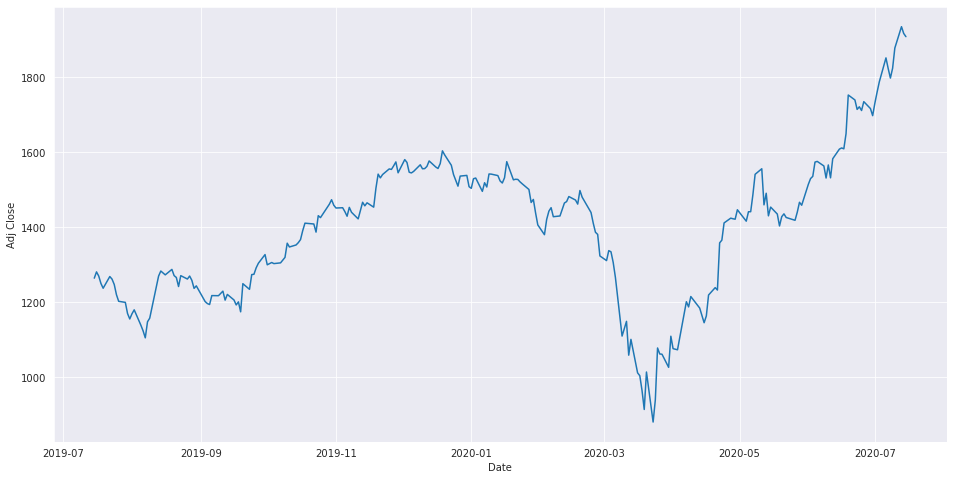

In [92]:
sns.set_style('darkgrid')
fig,ax = plt.subplots(figsize = (16,8)) 
sns.lineplot(x = 'Date', y = 'Adj Close', data = stocks_df, ax = ax)
fig.show()

Here are the observations from the above plot-
* The stock price of RELIANCE rose quite steadily from July, 2019 to December, 2019, with slight ups and downs during this time.
* Then, during the time period of January, 2020 to April, 2020, the price declined steeply, falling below INR1000. A primary reason for this can be the COVID-19 pandemic, which caused a standstill in the international and national markets.
* After April, 2020, in a sudden turn of events, the prices began to rise suddenly. The primary reason for this increase in the stock price can be the Facebook's $5.7 billion in Reliance Jio. After that, the RELIANCE stock prices have been on a constant rise.

---

**Now, let us have a look at the monthly average price of the RELIANCE stock.** This will require some feature engineering, where we first will have to group the data by months then get the mean stock price for each month group. 

In [93]:
# extracting features from the given data
stocks_df['month'] = pd.DatetimeIndex(stocks_df['Date']).month
stocks_df['year'] = pd.DatetimeIndex(stocks_df['Date']).year
stocks_df['day'] = pd.DatetimeIndex(stocks_df['Date']).day
stocks_df['weekday'] = pd.DatetimeIndex(stocks_df['Date']).weekday
stocks_df['Avg'] = (stocks_df.High + stocks_df.Low)/2

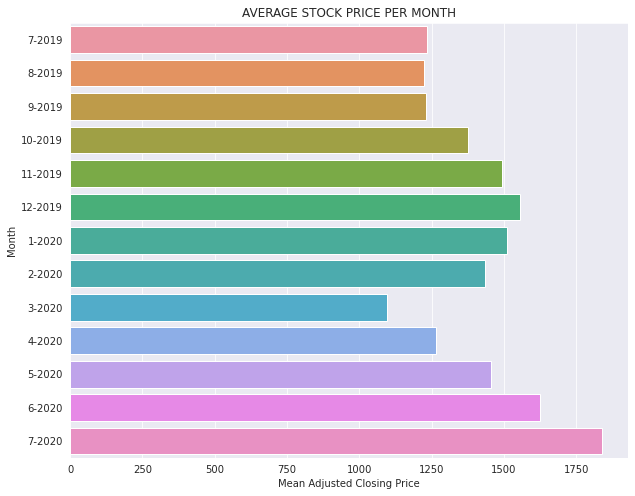

In [94]:
monthly_data = stocks_df.groupby(['year', 'month'])
month_list = []
mean_price = []
for k,_ in monthly_data:
    month = str(k[1]) + '-' + str(k[0])
    month_list.append(month)
    mean_price.append(monthly_data.get_group(k).mean()['Adj Close'])

fig,ax = plt.subplots(figsize = (10, 8)) 
sns.barplot(y = month_list, x = mean_price, ax = ax)
ax.set_xlabel('Mean Adjusted Closing Price')
ax.set_ylabel('Month')
ax.set_title('AVERAGE STOCK PRICE PER MONTH')
fig.show()

A few observations from the plot above:
* The time duration from April, 2020 onwards seems to be a really good phase for RELIANCE, with the stock price on a continuous rise.
* While the pandemic caused a dip in the share prices, RELIANCE managed to stay above an average of INR1000.

---
Now, let us view the daily price fluctuations for the RELIANCE stock price for a few months. By price fluctuations, we are referring to the price gap between the highest and lowest price of the stock for the day.

In [95]:
def dailyPriceFluctuations(grouped_df, month, year):
    data = grouped_df.get_group((year,month))
    month_dict = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
    fig, ax = plt.subplots(figsize = (15,5))
    sns.lineplot(x = 'day', y = 'High', marker = 'o', data = data, ax = ax)
    sns.lineplot(x = 'day', y = 'Low', marker = 's', data = data, ax = ax)
    ax.set_title('MONTH: ' + month_dict[month] + '-' + str(year))
    ax.set_ylabel('Prices')
    ax.set_xlabel('Day of Month')
    fig.show()

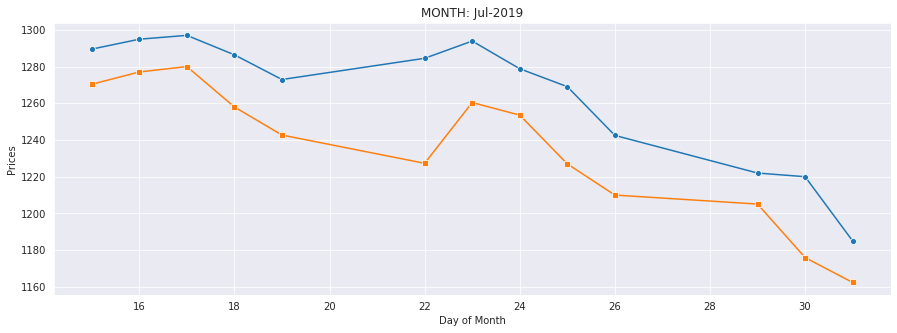

In [96]:
# July, 2019
dailyPriceFluctuations(monthly_data, month = 7, year = 2019)

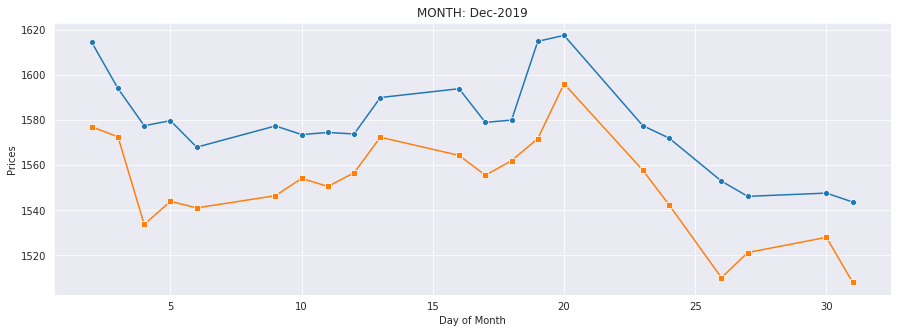

In [97]:
# December, 2019
dailyPriceFluctuations(monthly_data, month = 12, year = 2019)

A very interesting observation here. We can see the exact day the the RELIANCE stock prices started to experience the pandemic downfall, a period which continued for more than 3 months. As we can see from the graph above, the date was December 20, 2019. 

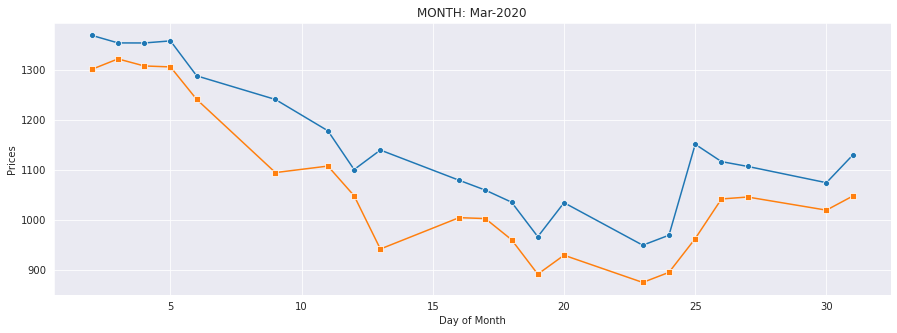

In [98]:
# March, 2020
dailyPriceFluctuations(monthly_data, month = 3, year = 2020)

Another interesting observation here. After a period of continuous downfall, it was aroung March 24, 2020 that the prices started to increase, continuing the trend steadinly for the following months.

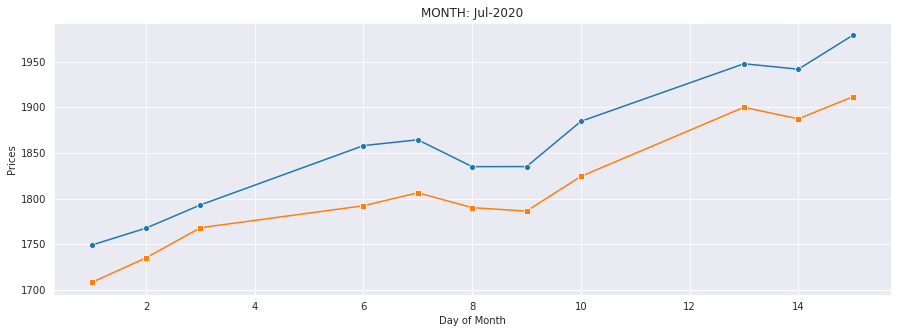

In [99]:
# July, 2020
dailyPriceFluctuations(monthly_data, month = 7, year = 2020)

There's one another observation from the above plots. 
* In case of Jul-2020, while the stock prices were steadily increasing, the price fluctuations were not very significant.
* on the other hand, in the month of Mar-2020, the prices were not steady, falling and rising unpredictably. Here, we can observe some significant price fluctuations.

This is a classic example of supply and demand. In the month of March, 2020, there was a lot of uncertainty in the markets. New buyers were looking into stepping into stock-market due to an all time low stock prices. Old buyers were selling stocks because of the fear of losing more money. This random trading caused a lot of fluctuations in the demand and supply of the stock prices. And this differece is evident in the RELIANCE stock price fluctuations.

On the other hand, the time period post Mar-2020 saw a steady rise in the price. Fresh investments from Facebook attracted the buyers. The demand increased steadily. And hence the lesser price fluctuations.

---
After seeing the plots, I had an interesting idea. Let us check which week days are the best to buy the RELIANCE stock, based on-
1. Overall trends (An average for the entire data, comprising of both price rises and falls) 
2. Current trends (Current trends comprise of the period from April-July, 2020)

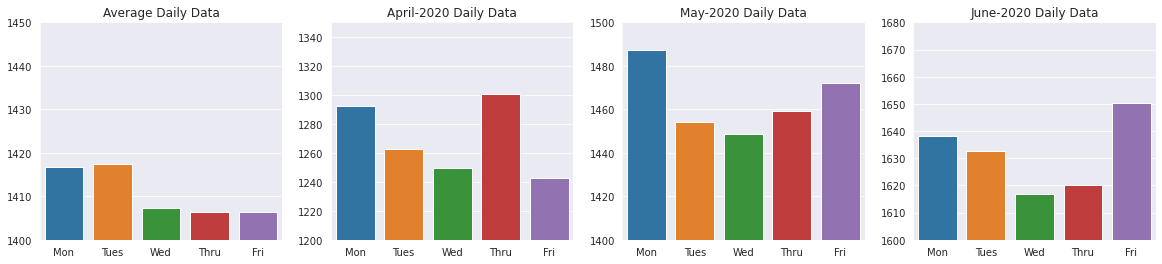

In [100]:
days = np.array(['Mon', 'Tues', 'Wed', 'Thru', 'Fri'])

fig, ax = plt.subplots(1, 4, figsize = (20, 4))

week_data = stocks_df.groupby(['weekday']).mean()
avg_daily = ((week_data.High + week_data.Low)/2).to_numpy()
sns.barplot(x = days, y = avg_daily, ax = ax[0])
ax[0].set_ylim(1400, 1450)
ax[0].set_title('Average Daily Data')

apr_data = monthly_data.get_group((2020,4)).groupby(['weekday']).mean()
avg_daily = ((apr_data.High + apr_data.Low)/2).to_numpy()
sns.barplot(x = days, y = avg_daily, ax = ax[1])
ax[1].set_ylim(1200, 1350)
ax[1].set_title('April-2020 Daily Data')


may_data = monthly_data.get_group((2020,5)).groupby(['weekday']).mean()
avg_daily = ((may_data.High + may_data.Low)/2).to_numpy()
sns.barplot(x = days, y = avg_daily, ax = ax[2])
ax[2].set_ylim(1400, 1500)
ax[2].set_title('May-2020 Daily Data')


jun_data = monthly_data.get_group((2020,6)).groupby(['weekday']).mean()
avg_daily = ((jun_data.High + jun_data.Low)/2).to_numpy()
sns.barplot(x = days, y = avg_daily, ax = ax[3])
ax[3].set_ylim(1600, 1680)
ax[3].set_title('June-2020 Daily Data')


fig.show()

Awesome! Next time I'm buying RELIANCE stocks, I now know the best day to play the gamble is Wednesday.

---
Next, let us observe how the average stock price and the volume of commodities available are correlated. We will see the observations for:
1. Overall trends (An average for the entire data, comprising of both price rises and falls over time)
2. Current trends (Current trends comprise of the period from April-July, 2020)

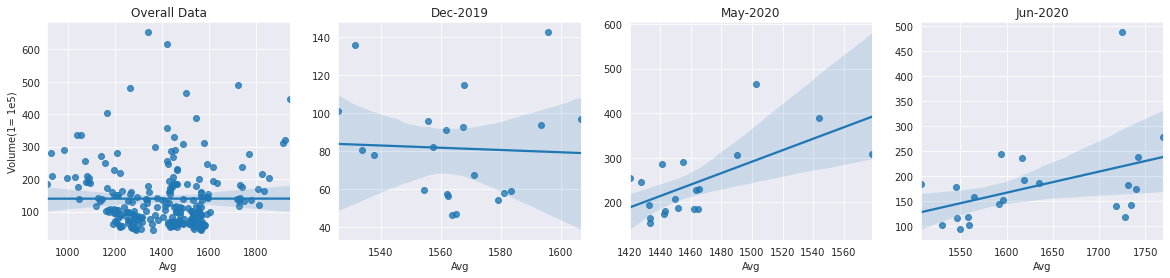

In [108]:
may_data = monthly_data.get_group((2020,5))
volume = may_data.Volume/100000

fig, ax = plt.subplots(1, 4, figsize = (20, 4))


volume = stocks_df.Volume/100000
sns.regplot(x = stocks_df['Avg'], y = volume, ax = ax[0])
ax[0].set_ylabel('Volume(1= 1e5)')
ax[0].set_title('Overall Data')

dec_data = monthly_data.get_group((2019,12))
volume = dec_data.Volume/100000
sns.regplot(x = dec_data['Avg'], y = volume, ax = ax[1])
ax[1].set_title('Dec-2019')
ax[1].set_ylabel('')

may_data = monthly_data.get_group((2020,5))
volume = may_data.Volume/100000
sns.regplot(x = may_data['Avg'], y = volume, ax = ax[2])
ax[2].set_title('May-2020')
ax[2].set_ylabel('')

jun_data = monthly_data.get_group((2020,6))
volume = jun_data.Volume/100000
sns.regplot(x = jun_data['Avg'], y = volume, ax = ax[3])
ax[3].set_title('Jun-2020')
ax[3].set_ylabel('')


fig.show()
# may_data

Observations from the above plots:
* It is evident the volume of comoditties has a very weak correlation with the average daily stock prices, almost 0 in case of the overall data.
* If we observe the plot from May-2020, we see that the linear regression line shows a considerable correlation, however, if we observe the confidence interval (the shaded blue region), we see that the uncertainty is very large. This means that the estimated correlations value is wrong/uncertain.
* These observation confirm that there is very weak correlation between the RELIANCE stock prices and the stock volume.